# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

This project will determine if an applicant's GRE score, GPA, and undergrad alma matter rank is associated with successful admittance to graduate school at UCLA. We are using data from [UCLA's Logit Regression in R tutorial](http://www.ats.ucla.edu/stat/r/dae/logit.htm). It is from an unknown time period. 

### Dataset:  Write up a description of your data and any cleaning that was completed

This dataset, after dropping any rows with null data, has 397 observations and four features: admit, GRE, GPA, and prestige. GRE ranges from 220 to 800 and GPA ranges from 2.26 to 4.0. Prestige features were split into dummy variables. 

Details: 

Variable | Description | Type of Variable
---|---|---
Admit | 0 = Not admitted, 1 = Admitted | Categorical
GRE | Applicant's GRE score, integer | Continuous
GPA | Applicant's grade point average | Continuous
Prestige | Rank of applicant's undergraduate alma matter, 1 being the highest and 4 being the lowest | Ordinal

In [2]:
import pandas as pd 
import numpy as np

df = pd.read_csv('../assets/admissions.csv')
df = df.dropna()
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [3]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


The distribution of GPA and GRE are both slightly negatively skewed:

/Users/cour7816/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115090990>]], dtype=object)

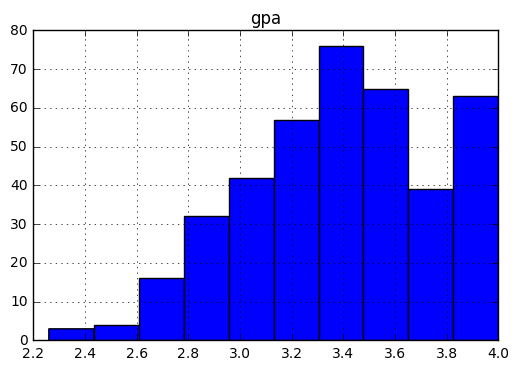

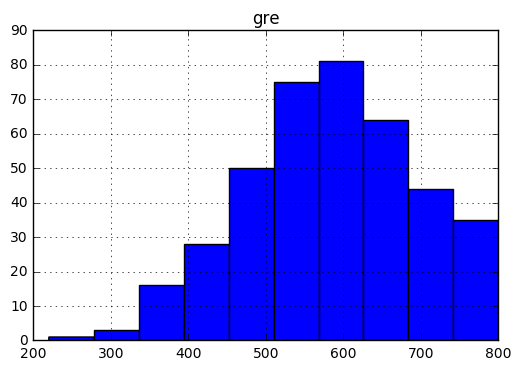

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist('gpa')
df.hist('gre')

In [5]:
df.prestige = df.prestige.astype(np.int32)
df = df.join(pd.get_dummies(df.prestige, prefix='prestige'))
df.head()

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380.0,3.61,3,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4,0.0,0.0,0.0,1.0


###  Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable:

| Not Admitted | Admitted
---| ---|---
GPA | 3.34 (0.37)  | 3.49 (0.37)
GRE | 573.58 (116.05) | 618.57 (109.26)
Prestige 1 | 46 (%) | 54 (%)
Prestige 2 | 64 (%) | 36 (%)
Prestige 3 | 77 (%) | 23 (%)
Prestige 4 | 82 (%) | 18 (%)

In [6]:
stats = df.groupby('admit')['gpa','gre'].mean()
stats['Stat']='Mean'
stats = stats.append(df.groupby('admit')['gpa','gre'].std())
stats = stats.fillna('Std')
stats

,Stat,gpa,gre
admit,,,
0,Mean,3.347159,573.579336
1,Mean,3.489206,618.571429
0,Std,0.376355,116.052798
1,Std,0.371655,109.257233


In [7]:
pd.pivot_table(df, values='admit', index=['prestige'])

prestige
1    0.540984
2    0.358108
3    0.231405
4    0.179104
Name: admit, dtype: float64

### Methods: Write up the methods used in your analysis

This analysis consists of a logistic regression to predict the outcome of a student's application to grad school (successful admission or unsuccessful) using their GRE score, GPA, and the prestige rank of their undergraduate alma matter.

We use the `admit` column as the dependent variable and `gre`, `gpa`, `prestige_2`, `prestige_3`, and `prestige_4` as the independent variables (we exclude `prestige_1` to prevent multicollinearity). 

In [8]:
df = df.drop(['prestige', 'prestige_1'], 1)
df.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380.0,3.61,0.0,1.0,0.0
1,1,660.0,3.67,0.0,1.0,0.0
2,1,800.0,4.00,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0


In [9]:
import statsmodels.api as sm

# adding an intercept because statsmodels doesn't do it for us
df['intercept'] = 1.0
# exclude our dependent variable 
train_cols = df.columns[1:]
# create the model
model = sm.Logit(df['admit'], df[train_cols])
# fit the model
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


### Results: Write up your results

Applicants have a better chance of being admitted to grad school if the prestige rank of their undergrad school is higher. 

If the applicant's undergrad school has a prestige rank of 2, the odds of being admitted are 51% compared to all other applicants. 

If the applicant's undergrad school has a prestige rank of 3, the odds of being admitted are 26% compared to all other applicants. 

If the applicant's undergrad school has a prestige rank of 4, the odds of being admitted are 21% compared to all other applicants. 

If an applicant's GRE score increases by 1 unit, the odds of being admitted increases by 100%. 

If an applicant's GPA score increases by 1 unit, the odds of being admitted increases by 218%. 

In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 06 Feb 2017   Pseudo R-squ.:                 0.08166
Time:                        17:23:39   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept     -3.8769      1.142     -3.393      0.001        -6.116    -1.638
==============================================================================
"""

In [11]:
print result.conf_int()

                   0         1
gre         0.000074  0.004362
gpa         0.127619  1.431056
prestige_2 -1.301337 -0.058936
prestige_3 -2.014579 -0.662776
prestige_4 -2.371624 -0.735197
intercept  -6.116077 -1.637631


In [12]:
print 'ORs are: \n', np.exp(result.params)

ORs are: 
gre           1.002221
gpa           2.180027
prestige_2    0.506548
prestige_3    0.262192
prestige_4    0.211525
intercept     0.020716
dtype: float64


### Visuals: Provide a table or visualization of these results

As seen in the figures below, the schools with higher prestige have a higher probability of successful admission. 
Students with higher GRE and GPA scores also have a higher probability of successful admission.

<img src='../assets/images/figure1.jpg' height= 100% width= 100%>

<img src='../assets/images/figure2.jpg' height= 100% width= 100%>

### Discussion: Write up your discussion and future steps

This study used logistic regression to determine if an applicant's GRE score, GPA, and undergrad alma matter rank is associated with successful admittance to graduate school at UCLA. Through the analysis results we are confident that there is an inverse relationship between the probability of being admited to graduate school and the prestige of a candidate's undergraduate school. Similarly, there is a positive relationship between an applicant's GPA and GRE score and the probability of being admitted to graduate school. 

This study is not without its limitations. There is potential multicollinearity between variables and the distribution of GPA and GRE have a slightly skewed distribution, which we did not correct for. 

Future steps would be to account for multicollinearity and distributions.